In [21]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic-dataset/Titanic-Dataset.csv


In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [24]:
df=pd.read_csv("/kaggle/input/titanic-dataset/Titanic-Dataset.csv")

In [25]:
print("Shape : ",df.shape)
print("Size : ",df.size)
print("No.of Dimensions : ",df.ndim)
print("Unique : ",df.nunique)
print("Columns : ",df.columns)
print("Index : ",df.index)

Shape :  (891, 12)
Size :  10692
No.of Dimensions :  2
Unique :  <bound method DataFrame.nunique of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


In [26]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [27]:
df.tail()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [29]:
print("Duplicates : ",df.duplicated().sum())
print("Null values : \n\n",df.isnull().sum())

Duplicates :  0
Null values : 

 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [30]:
df["Age"]=df["Age"].fillna(df["Age"].mean())
df["Embarked"]=df["Embarked"].fillna(df["Embarked"].mode()[0])
df=df.drop(columns=["Cabin"])

In [31]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [32]:
df["Survived"]=df["Survived"].map({0:"Died",1:"Survived"})

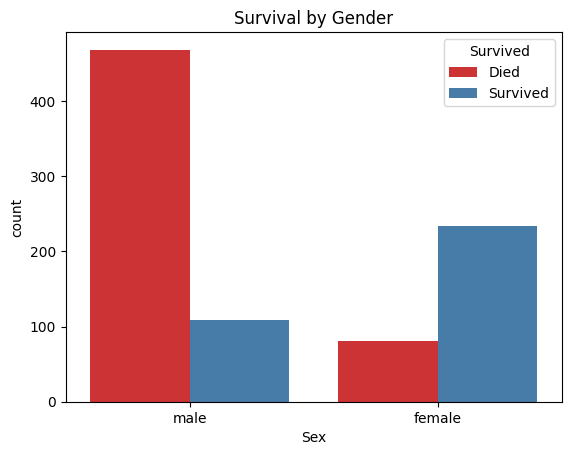

In [33]:
sns.countplot(data=df,x="Sex",hue="Survived",palette="Set1")
plt.title("Survival by Gender")
plt.show()

In [35]:
le=LabelEncoder()
df["Sex"]=le.fit_transform(df["Sex"])
df['Embarked']=le.fit_transform(df["Embarked"])

In [36]:
def preprocess_data():
    features=["Age","Sex","Embarked","Pclass","SibSp","Parch","Fare"]
    X=df[features]
    y=df["Survived"]
    return train_test_split(X,y,test_size=0.2,random_state=42)
if __name__=="__main__":
    X_train,X_test,y_train,y_test=preprocess_data()
    print("Data Preprocessing Complete!!!")
    print(f"Train shape : {X_train.shape}\n Test shape : {X_test.shape}\n")
    print(f'Sample X:\n{X_train.head()}')

Data Preprocessing Complete!!!
Train shape : (712, 7)
 Test shape : (179, 7)

Sample X:
      Age  Sex  Embarked  Pclass  SibSp  Parch     Fare
331  45.5    1         2       1      0      0  28.5000
733  23.0    1         2       2      0      0  13.0000
382  32.0    1         2       3      0      0   7.9250
704  26.0    1         2       3      1      0   7.8542
813   6.0    0         2       3      4      2  31.2750


In [37]:
df["Age"]=df["Age"].fillna(df["Age"].mode()[0])
df["Embarked"]= df["Embarked"].fillna(df["Embarked"].mode()[0])

In [38]:
dt=tree.DecisionTreeClassifier()
dt.fit(X_train,y_train)
print("Decision Tree Classifier",dt.score(X_test,y_test))
y_pred=dt.predict(X_test)
print("Accuracy : ",accuracy_score(y_test,y_pred))
print("Classification : \n",classification_report(y_test,y_pred))

Decision Tree Classifier 0.7877094972067039
Accuracy :  0.7877094972067039
Classification : 
               precision    recall  f1-score   support

        Died       0.82      0.82      0.82       105
    Survived       0.74      0.74      0.74        74

    accuracy                           0.79       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



In [39]:
rf=RandomForestClassifier(n_estimators=100,random_state=42)
rf.fit(X_train,y_train)
print("Random Forest Classifier Accuracy : ",rf.score(X_test,y_test))
y_pred=rf.predict(X_test)
print("Accuracy : ",accuracy_score(y_test,y_pred))
print("Classification : \n",classification_report(y_test,y_pred))

Random Forest Classifier Accuracy :  0.8100558659217877
Accuracy :  0.8100558659217877
Classification : 
               precision    recall  f1-score   support

        Died       0.83      0.86      0.84       105
    Survived       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [40]:
lr=LogisticRegression(max_iter=1000)
lr.fit(X_train,y_train)
print("Logistic Regression accuracy : ",lr.score(X_test,y_test))
y_pred=lr.predict(X_test)
print("Accuracy : ",accuracy_score(y_test,y_pred))
print("Classification : \n",classification_report(y_test,y_pred))

Logistic Regression accuracy :  0.8100558659217877
Accuracy :  0.8100558659217877
Classification : 
               precision    recall  f1-score   support

        Died       0.83      0.86      0.84       105
    Survived       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



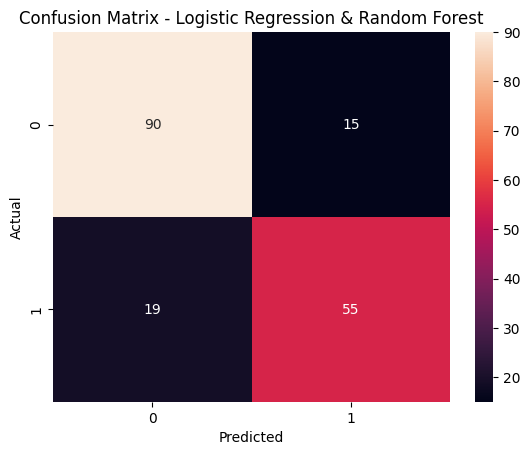

In [41]:
y_pred = rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
plt.title("Confusion Matrix - Logistic Regression & Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()